Defaulting to user installation because normal site-packages is not writeable


2024-12-09 23:44:19.692522: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2024-12-09 23:44:19.955352: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0867 - val_loss: 0.0293
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0263 - val_loss: 0.0188
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0181 - val_loss: 0.0151
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0150 - val_loss: 0.0132
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - 

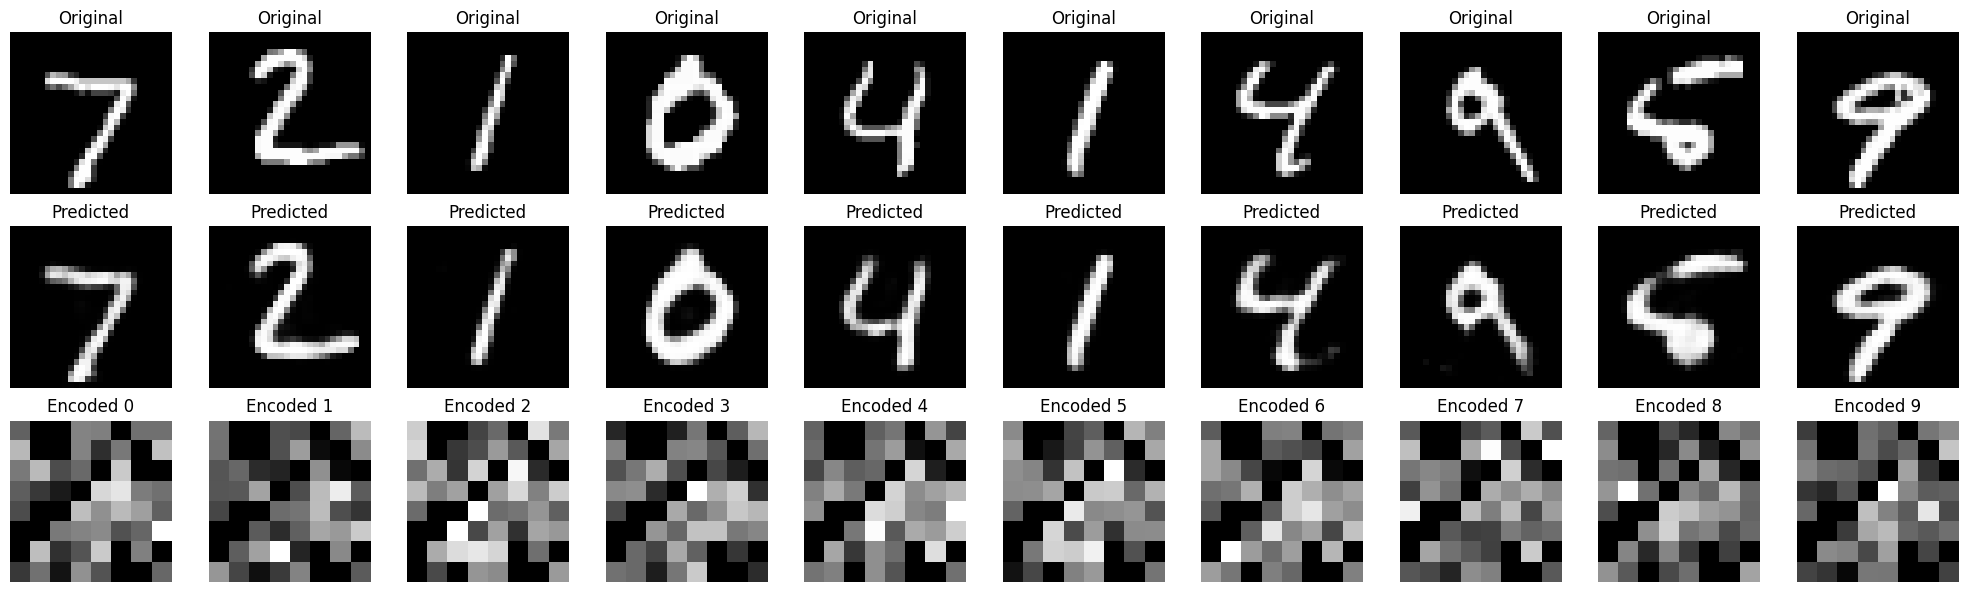

In [5]:
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Set encoding dimension
encoding_dim = 64

# Define encoder model
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define decoder model
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Train model
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Create the encoder model
encoder = Model(input_img, encoded)

# Get the encoded representations of the test data
encoded_imgs = encoder.predict(x_test)

# Choose an image index to display
index = 0 # Change this to any index in the x_test dataset (0 to 9999)

# Get the encoded (reduced) representation for the chosen image
encoded_image = encoded_imgs[index]

# Reshape the encoded 64-dimensional vector into an 8x8 grid (since encoding_dim=64)
encoded_image_reshaped = encoded_image.reshape(8, 8)

# Choose number of images to display
n = 10  # Number of images to display

# Optionally, check the shape of the original images as well
print("Shape of original images:", x_test.shape)

# Check the dimensions of the encoded representations
print("Shape of encoded representations:", encoded_imgs.shape)

# Print the number of reduced features
num_reduced_features = encoded_imgs.shape[1]
print("Number of reduced features:", num_reduced_features)

plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    # Display encoded image (latent space representation)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    encoded_image = encoded_imgs[i].reshape(8, 8)  # Reshape to 8x8 for visualization
    plt.imshow(encoded_image)
    plt.title(f"Encoded {i}")
    plt.gray()
    ax.axis('off')

    # Display reconstruction (predicted image)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(autoencoder.predict(x_test[i].reshape(1, 784)).reshape(28, 28))
    plt.title("Predicted")
    ax.axis('off')

plt.tight_layout()
plt.show()